# Lecture 24 - Practical Methodology & Project Discussion

## Typical Workflow of a Supervised Learning System

1. **Data Acquisition**

One of the most (if not the one) crucial steps in building a supervised learning system. The collected data will have a tremendous impact on the subsequent steps of the machine learning system including: feature extraction, model selection and model validation.

2. **Feature Generation, Feature Extraction and/or Feature Selection**

Sometimes the data you are working with was already collected and features were extracted, so you will have little control of the first two steps, other than some feature engineering you may wish to apply.
When you do have control of your data, feature extraction will also be an important step. We will discuss more details on this broad topic, specifically for image data.

In Deep Learning, this step is often included with step 4, model selection.

3. **Pre-processing**

In this stage you will prepare the data to be *fed* into the system. Data pre-processing include **normalization**. This can be a big difference in the results. Always normalize the data.

4. **Model Selection**

Selecting the model can be influenced by any information you may have about the data.

5. **Hyperparameter Tuning**

In this step you will be mostly trying to find the set of parameters that fit the data the best but avoid overfitting. This includes implementing strategies such as: regularization, k-fold cross-validation and plotting learning curves.

6. **Model Evaluation**

The last step of a supervised learning system is to report on the model's performance. This may include any statistical measures such as: mean average error, Quantile-Quantile (Q-Q) plot and hypothesis tests. If you want to answer the question "Is A a more accurate algorithm than B?", this becomes the hypothesis "Can we say that the average error of learners trained by A is significantly lower than the average error of learners trained by B?". So we can design statistical tests and measures to evaluate the models.



## Practical Design Process

Successfully applying machine learning or deep learning techniques requires more than just a good knowledge of what algorithms exist and the principles that explain how they work. A good machine learning practitioner also needs to know how to choose an algorithm for a particular application and how to monitor and respond to feedback obtained from experiments in order to improve a machine learning system. 

During day-to-day development of machine learning systems, practitioners need to decide whether to gather more data, increase or decrease model complexity, add or remove regularizing features, improve the optimization of a model, improve approximate inference in a model, or debug the software implementation of the model. All these operations are at the very least time consuming to try out, so it is important tobe able to determine the right course of action rather than blindly guessing.

Typical practical design process:

* Determine your goals - what error metric to use, and your target value for this error metric. These goals and error metrics should be driven by the problem that the application is intended to solve.

* Establish a working end-to-end pipeline as soon as possible, including the estimation of the appropriate performance metrics.

* Instrument the system well to determine bottlenecks in performance. Diagnose which components are performing worse than expected and whether poor performance is due to overﬁtting, underﬁtting, or a defect in the data or software.

* Repeatedly make incremental changes such as gathering new data, adjusting hyperparameters, or changing algorithms, based on speciﬁc ﬁndings from your instrumentation.

### Performance Metrics

Determining your goals, in terms of which error metric to use, is a necessary ﬁrst step because your error metric will guide all your future actions. You should also have an idea of what level of performance you desire.

Sometimes it is much more costly to make one kind of a mistake than another. For example, an e-mail spam detection system can make two kinds of mistakes: incorrectly classifying a legitimate message as spam, and incorrectly allowing a spam message to appear in the inbox. It is much worse to block a legitimate message than to allow a questionable message to pass through. Clearly, accuracy is a poor way to characterize the performance of such a system. One way to solve this problem isto instead measure **precision** and **recall**.

### Default Baseline Methods

After choosing performance metrics and goals, the next step in any practical application is to establish a reasonable end-to-end system.

First, choose the general category of model based on the structure of your data. If you want to perform supervised learning with ﬁxed-size vectors as input, use a feedforward network with fully connected layers. If the input has known topological structure (for example, if the input is an image), use a convolutional network.

A reasonable choice of optimization algorithm is ADAM which includes a momentum term and an adaptive learning rate policy.

Unless your training set contains tens of millions of examples or more, you should include some mild forms of **regularization** from the start. Early stopping should be used almost universally.

Dropout is an excellent regularizer that is easyto implement and compatible with many models and training algorithms. Batch normalization also sometimes reduces generalization error and allows dropout tobe omitted, because of the noise in the estimate of the statistics used to normalize each variable.

If your task is similar to another task that has been studied extensively, you will probably do well by ﬁrst copying the model and algorithm that is already known to perform best on the previously studied task. You may even want to copy a trained model from that task. This is also referred to as **transfer learning**.

### Determining Whether to Gather More Data

After the ﬁrst end-to-end system is established, it is time to measure the performance of the algorithm and determine how to improve it. It is often much better to gather more data than to improve the learning algorithm (or first model of choice).

How does one decide whether to gather more data?

1. Determine whether the performance on the training set is acceptable. If performance on the training set is poor, the learning algorithm is not using the training data that is already available, so there is no reason to gather more data. 
    * Instead, try adding complexity to the model by adding more layers or adding more hidden units to each layer. 
    * Also, try improving the optimization algorithm, for example by tuning the learning rate. 
    * If more complex models and carefully tuned optimization algorithms do not work well, then the problem might be the *quality* of the training data. The data may be too noisy or may not include the right inputs needed to predict the desired outputs. This suggests starting over, collecting cleaner data, or collectinga richer set of features.

2. If the performance on the training set is acceptable, then measure the performance on a test set. If the performance on the test set is also acceptable, then there is nothing left to be done. If test set performance is much worse than training set performance, then gathering more data is one of the most effective solutions. In some applications, gathering more data is simply infeasible or impossible. 
    * A simple alternative to gathering more data is to reduce the size of the model or improve regularization, by adjusting hyperparameters such as weight decay coeﬃcients,or by adding regularization strategies such as dropout. 
    * If you ﬁnd that the gap between train and test performance is still unacceptable even after tuning the regularization hyperparameters, then gathering more data is advisable.
    
3. When deciding whether to gather more data, it is also necessary to decide how much to gather. It is helpful to plot curves showing the relationship between training set size and generalization error. 
    * You can experiment with training set sizes on a logarithmic scale, for example, doubling the number of examples between consecutive experiments.

### Selecting Hyperparameters

The popularity of several learning algorithms such as regression and SVMs stems in part from their ability to perform well with only one or two tuned hyperparameters. Neural networks can sometimes perform well with only a small number of tuned hyperparameters, but often benefit signiﬁcantly from tuning of forty or more.

We can therefore develop hyperparameter optimization algorithms that wrap a learning algorithm and choose its hyperparameters. For example, we have seen how to do this using ```scikit-learn``` with the function ```GridSearchCV```.

#### Random Search

In 2012, Bergstra and Bengio, proposed a alternative to grid search: **random search**. It is simple to implement, more convenient to use and has shown to converge much faster to good values in the hyperparameter space.

<div><img src="figures/RandomSearch.png", width="400"><!div>

In a random search we deﬁne a marginal distribution for each hyperparameter, for example, a Bernoulli for binary or discrete hyperparameters, or a uniform distribution for continuous real-valued hyperparameters.
    
In ```scikit-learn``` we can implement random search by using the function ```RandomizedSearchCV```.
    
For **PyTorch** models, you can use [**Skorch**](https://skorch.readthedocs.io/en/stable/) - a scikit-learn compatible neural network library that wraps PyTorch.

### Debugging Strategies

When a machine learning system performs poorly, it is usually difficult to tell whether the poor performance is intrinsic to the algorithm itself or whether there is a bug in the implementation of the algorithm.

Assuming you are using an off-the-shelf algorithm, some important debugging tests include:

1. **Visualize the model in action:** When training a model to detect objects in images, view some images with the detections proposed by the model displayed superimposed on the image. When training a generative model of speech, listen to some of the speech samples it produces. This may seem obvious, but it is easy to fall into the practice of looking only at quantitative performance measurements like accuracy or log-likelihood.

2. **Visualize the worst mistakes:** Most models are able to output some sort of confidence measure for the task they perform. For example, classifiers based on a softmax output layer assign a probability to each class. The probability assigned to the most likely class thus gives an estimate of the conﬁdence the model has in its classiﬁcation decision. Typically, maximum likelihood training results in these values being overestimates rather than accurate probabilities of correct prediction, but they are somewhat useful in the sense that examples that are actually less likely to be correctly labeled receive smaller probabilities under the model. By viewing the training set examples that are the hardest to model correctly, one can often discover problems with the way the data have been preprocessed or labeled.

3. **Reason about software using training and test error:** It is often diﬃcult to determine whether the underlying software is correctly implemented. Some clues can be obtained from the training and test errors. If training error is low but test error is high, then it is likely that that the training procedure works correctly, and the model is overﬁtting for fundamental algorithmic reasons. An alternative possibility is that the test error is measured incorrectly because of a problem with saving the model after training then reloading it for test set evaluation, or because the test data was prepared differently from the training data. If both training and test errors are high, then it is difficult to determine whether there is a software defect or whether the model is underfitting due to fundamental algorithmic reasons. This scenario requires further tests, described next.

4. **Fit a tiny dataset:** If you have high error on the training set, determine whether it is due to genuine underfitting or due to a software defect. Usually even small models can be guaranteed to be able fit a sufficiently small dataset. For example, a classiﬁcation dataset with only one example can be fit just by setting the biases of the output layer correctly. Usually if you cannot train a classiﬁer to correctly label a single example, there is a software defect preventing successful optimization on the training set. This test can be extended to a small dataset with few examples.

## Other Practical Strategies

### Boosting

Boosting is an ensemble learning method.

If we take a collection of very poor (weak in the jargon) learners, each performing only just better than chance, then by putting them together it is possible to make an ensemble learner that can perform arbitrarily well. So we just need lots of low-quality learners, and a way to put them together usefully, and we can make a learner that will do very well.

The principal algorithm of boosting is named **AdaBoost** (Adaptive Boosting). Essentially, it give weights to each data point according to how difficult previous learners have found to get it correct. These weights are given to the classifier as part of the input when it is trained. The predictions from all learners are then combined through a weighted majority vote (or sum) to produce the final prediction.

In ```scikit-learn```, you can use AdaBoost classification using the function ```AdaBoostClassifier```. Each learner can be a shallow network.

### Bagging

Bagging (bootstrap aggregating) is also an emsemble learning method. Bagging is a technique for reducing generalization error by combining several models. The idea is to train several different models separately, then have all the models vote on the output for test examples. This is an example of a general strategy in machine learning called model averaging. The reason that model averaging works is that different models will usually not make all the same errors on the test set.

Bagging methods work best with strong and complex models, in contrast with boosting methods which usually work best with weak models.

In ```scikit-learn```, you can use Bagging using the function ```BaggingClassifier```.

# Example

Suppose that we want to train a model that is able to recreate the UF network data set show below.

We will create a 2-hidden layer network to distinguish the letters and the background. We want to determine:

(1) the number of units for each hidden layer,
(2) the learning rate, and
(3) number of epochs. 

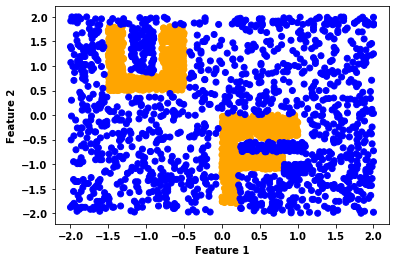

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap

UF_network = np.load('UF_network.npy')
X = UF_network[:,:2]
y = UF_network[:,2]

cm = ListedColormap(['blue', 'orange'])
plt.scatter(X[:,0],X[:,1],c=y, cmap=cm);
plt.xlabel('Feature 1')
plt.ylabel('Feature 2');

In [2]:
def plot_LC_and_DB(X, model, lc=True):
    '''This function will plot the learning curve and decision boundary
    for a given trained model and training data X.
    model: is a sklearn model structure
    X: training data'''
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))
    
    if lc:
        fig = plt.figure(figsize=(15,5))
        fig.add_subplot(1,2,1)
        plt.plot(model.loss_curve_)
        plt.title('Learning Curve')
        plt.xlabel('Epochs')
        plt.ylabel('Loss Function')

        cm = ListedColormap(['blue', 'orange'])
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape) 
        fig.add_subplot(1,2,2)
        plt.contourf(xx, yy, Z, cmap=cm, alpha=.8);
        plt.title('Decision Boundary')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show();
    else:
        cm = ListedColormap(['blue', 'orange'])
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=cm, alpha=.8);
        plt.title('Decision Boundary')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.show();

### Problem 1

How many units will you need in the first and second hidden layers? Why? Justify your answer by providing an explanation of each hidden unit role in creating the UF network.

### Problem 2 

Can you achieve the same goal with a *single hidden layer network*? Why or why not?

### Problem 3

Select learning rates and number of epochs that are able to recreate the UF network.

In [3]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, expon, randint

net = MLPClassifier(activation='tanh',
                   hidden_layer_sizes=(20,10),
                   n_iter_no_change=10000)

In [4]:
distributions = dict(learning_rate_init = expon(loc=0.001,scale=0.1),
                    max_iter = randint(low=100,high=10000000))

In [5]:
classifier = RandomizedSearchCV(net, distributions, random_state=32)
classifier

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=MLPClassifier(activation='tanh', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(20, 10),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_fun=15000, max_iter=200,
                                           momentum=0.9, n_iter_no_change=10000,
                                           nesterovs_momentum=True, power_t=0.5...
                                           verbose=False, warm_start=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate_init': <scipy.stats._distn_in

In [ ]:
search = classifier.fit(X,y)
search.best_params_

C:\Users\Catia\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.001
Number of Epochs:  10000
Accuracy =  99.97 %
-----------------------------------


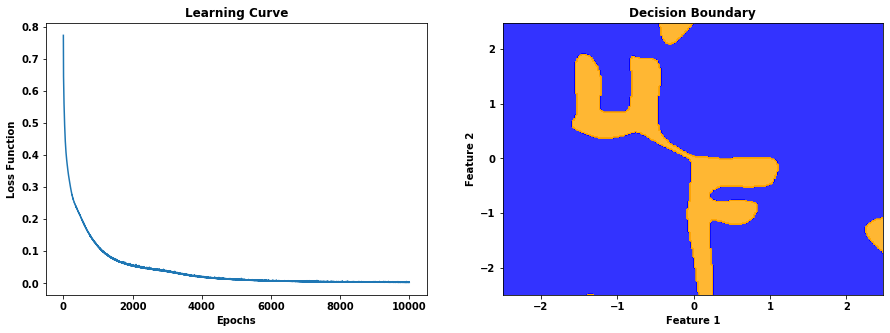

In [11]:
net_hidden_layers = [(16,6)]
net_learning_rate = [0.001]
epochs = [10000]

for i in net_hidden_layers:
    for j in net_learning_rate:
        for k in epochs:
            net.set_params(hidden_layer_sizes = i, learning_rate_init = j, max_iter = k)
            net.fit(X, y)
            y_pred = net.predict(X)

            acc_score = accuracy_score(y, y_pred)
            print('-----------------------------------')
            print('Hidden Layer Architecture: ', i)
            print('Learning Rate: ', j)
            print('Number of Epochs: ', k)
            print('Accuracy = ', np.round(acc_score*100,2),'%')
            print('-----------------------------------')
            plot_LC_and_DB(X, net)

### Problem 4

Boosting shallow models.

In [7]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=6)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

-----------------------------------
Hidden Layer Architecture:  (16, 6)
Learning Rate:  0.001
Number of Epochs:  100000
Accuracy =  85.83 %
-----------------------------------


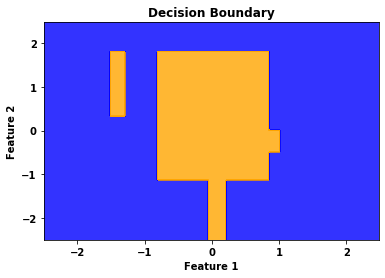

In [8]:
model.fit(X, y)
y_pred = model.predict(X)

acc_score = accuracy_score(y, y_pred)
print('-----------------------------------')
print('Hidden Layer Architecture: ', i)
print('Learning Rate: ', j)
print('Number of Epochs: ', k)
print('Accuracy = ', np.round(acc_score*100,2),'%')
print('-----------------------------------')
plot_LC_and_DB(X, model, False)

In [9]:
from sklearn.ensemble import AdaBoostClassifier

boost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=6),
                          n_estimators=20).fit(X,y)

Accuracy =  100.0 %
-----------------------------------


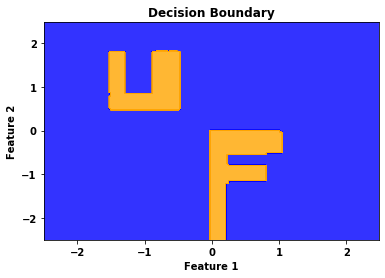

In [10]:
y_pred = boost.predict(X)

acc_score = accuracy_score(y, y_pred)
print('Accuracy = ', np.round(acc_score*100,2),'%')
print('-----------------------------------')
plot_LC_and_DB(X, boost, False)

# Final Project

Final Project Grading = 25% implementation + 25% accuracy on "easy" test set + 30% project report + 20% project presentation

## Due Dates
* Report and Code are due on **April 17, 2020, 11:59 pm**. Your project report and code should be pushed to your final project repository on GitHub. (Don't forget to create your repository, follow link [here](https://ufl.instructure.com/courses/395133/assignments/4147044))

* Project Presentations are due **April 20, 2020, 10:40 am**. You will upload your final presentation file to Canvas, [here](https://ufl.instructure.com/courses/395133/assignments/4147053).

## In-class Project Work
Lectures 25 and 26, April 8 and April 13, we will hold one-on-one project meetings with each project team. These meetings will be 20 minutes long.

Include your team name under your selected time here: [Project Discussion - Schedule Meeting Times](https://ufl.instructure.com/courses/395133/pages/project-discussion-schedule-meeting-times)

Unique Zoom links will be sent to each team through your GitHub team page discussion board. Please make your selections by April 7 @ 3:00 PM.

## Project Code

Be sure your code contains the following files:
1. **train.py:** includes a function that will run your training code on an input data set X and desired output vector Y. Any parameter settings must be easy to find and modify.

2. **test.py:** includes a function that will run your testing code on an input data set X. Note: Your test.py code should already be trained and have parameters set! Any parameter settings must be easy to find and modify. It should return a vector with the class label associated with each input data point X.

3. **README.txt:** file that clearly illustrates how to run your code.

## Project Report

You should write a report that includes the sections listed below. Your report should follow the IEEE transactions format (single spaced, double column). Focus your report on your training and testing strategies for the contest and any unique implementations. Templates for the IEEE transactions format can be found here: https://www.ieee.org/conferences/publishing/templates.html

The maximum number of pages for the report is 4. If there are any pages beyond page 4, they will discarded and not read or graded. It should be written with correct English grammar and spelling. Be precise - use pseudo-code or equations to be precise.

Your report should contain the following sections:

1. **Abstract:** A summary description of the contents of the report and your findings.

2. **Introduction:** Overview of your experiment and a literature review. For the literature review, include any references to any relevant papers for your experiment. So, whatever you decide to
do, search the ACM and IEEE (or other) literature for relevant papers to read and refer to.

3. **Implementation:** Describe and outline any specific implementation details for your project. A reader should be able to recreate your implementation and experiments from your project report.
How will you identify characters that were not in the training data?

4. **Experiments:** Carefully describe your experiments with the training data set and any other small toy data sets you constructed. Include a description of what the goal each individual experiment is and what your findings are. This is the bulk of what you will be graded on - if your experimental design is not sound or your experiments do not make sense, you will lose points.

5. **Conclusions:** Describe any conclusions or things you learned from the project. Your conclusions must follow from what you did. Do not copy something out of a paper or say something that has no experimental support in the Experiments section.

6. **References:** Listing of all references in IEEE bibliography format.

## Project Presentations

Project presentations will happen April 20 and April 22. 

Each team is expected to take no more than **15 minutes** (10 minutes presentation + 5 minutes Q/A) and all team members must participate in the presentation.

Presentations will happen live via Zoom. 

## Project Extra Credit Contest

Your goal is to train your system to distinguish between ASL characters. The teams with the best classification accuracy on the "hard" data set will get extra credit. The "hard" data set consists of the following characters: 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i' and 'unknown'. There will be test data points from classes that do not appear in the training data. So, you will want to come up with a way to identify when a test point class is "unknown" or was not in the training data. The label you should return for this case is -1.

Please have your code output a class label that matches the class value in the provided training data. These should be: 1, 2, 3, 4, 5, 6, 7, 8, 9 and -1 respectively.